## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.

In order to answer the key business questions, I will follow the steps of the data analysis process: **Ask**, **Prepare**, **Process**, **Analyze**, **Share**, and **Act**.

I will use
- Python for the **Prepare**, **Process**, and **Analyze** phases.
- Power BI for the **Share** and **Act** phases.

## Ask
The task is to use the previous 12 months of Cyclistic trip data to understand how casual riders and annual members use Cyclistic bikes differently.

The stakeholders are:
- **Lily Moreno**: The director of marketing and my manager.
- **Cyclistic marketing analytics team**.
- **Cyclistic executive team**.

## Prepare
The data has been made available by Motivate International Inc. The data is available <a href="https://divvy-tripdata.s3.amazonaws.com/index.html">here</a>.
I downloaded the data from 07/2022 till 06/2023 as csv files.


- Import packages and libraries

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Importing the datasets then merge it to a single dataframe.

In [2]:
# Read csv files to a dfs

df1 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202207-divvy-tripdata.csv")
df2 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202208-divvy-tripdata.csv")
df3 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202209-divvy-tripdata.csv")
df4 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202210-divvy-tripdata.csv")
df5 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202211-divvy-tripdata.csv")
df6 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202212-divvy-tripdata.csv")
df7 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202301-divvy-tripdata.csv")
df8 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202302-divvy-tripdata.csv")
df9 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202303-divvy-tripdata.csv")
df10 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202304-divvy-tripdata.csv")
df11 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202305-divvy-tripdata.csv")
df12 = pd.read_csv(r"C:\Users\elbre\Desktop\Google Data Analytics Professional Certificate - Capstone\Data Set\CSV files\Trip Data for past 12 months\202306-divvy-tripdata.csv")

In [3]:
# Inspect a sample dataset.

df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


In [4]:
# create a list of dataframes

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

# concat all df in one new df

df = pd.concat(dfs, axis=0, ignore_index=True)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


## Process

In [6]:
# Droping columns that are not important for the analysis.
df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lng', 'end_lat'], axis = 1, inplace = True)

In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,41.907066,-87.667252,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,41.869621,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,41.869621,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,41.869621,-87.623981,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,41.891466,-87.626761,member


# Analyze

- EDA Process

In [8]:
df.shape

(5779444, 7)

In [9]:
# Get more information about the data, including data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779444 entries, 0 to 5779443
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ride_id        object 
 1   rideable_type  object 
 2   started_at     object 
 3   ended_at       object 
 4   start_lat      float64
 5   start_lng      float64
 6   member_casual  object 
dtypes: float64(2), object(5)
memory usage: 308.7+ MB


In [10]:
# Get sum of null values in each column.
df.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
member_casual    0
dtype: int64

In [11]:
# Convert date columns from object to datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [12]:
# create a ride length column in min.
df['ride_length'] = (df['ended_at'] - df['started_at']) / pd.Timedelta(minutes = 1)
df['ride_length'] = df['ride_length'].astype('int32')

In [13]:
# create a hour of day column
df['hour_of_day'] = df['started_at'].dt.hour

In [14]:
# creat a day_of_week column

df['day_of_week'] = df['started_at'].dt.dayofweek + 1

# creat a day_name column

df['day_name'] = df['started_at'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,41.907066,-87.667252,member,11,8,2,Tuesday
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,41.869621,-87.623981,casual,1,12,2,Tuesday
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,41.869621,-87.623981,casual,7,13,7,Sunday
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,41.869621,-87.623981,casual,58,17,7,Sunday
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,41.891466,-87.626761,member,26,19,3,Wednesday


In [15]:
# Create a new `month` column

df['month'] = df['started_at'].dt.month

In [16]:
# creat month_name column
df['month_name'] = df['started_at'].dt.month_name()

In [17]:
# create a dict with month numbers as key and season names as values.
seasons = {1 : 'winter', 2 : 'winter',
           3 : 'spring', 4 : 'spring',
           5 : 'spring', 6 : 'summer',
           7 : 'summer', 8 : 'summer',
           9 : 'fall', 10 : 'fall',
           11 : 'fall', 12 : 'winter'}
# create a season column and map the month numbers to season name.
df['season'] = df['month'].map(seasons)

df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,41.907066,-87.667252,member,11,8,2,Tuesday,7,July,summer
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,41.869621,-87.623981,casual,1,12,2,Tuesday,7,July,summer
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,41.869621,-87.623981,casual,7,13,7,Sunday,7,July,summer
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,41.869621,-87.623981,casual,58,17,7,Sunday,7,July,summer
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,41.891466,-87.626761,member,26,19,3,Wednesday,7,July,summer


In [18]:
df.duplicated().sum()

0

In [19]:
# Get describtive satatistics about the data.
df.describe(include='all', datetime_is_numeric=True)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
count,5779444,5779444,5779444,5779444,5.779444e+06,5.779444e+06,5779444,5.779444e+06,5.779444e+06,5.779444e+06,5779444,5.779444e+06,5779444,5779444
unique,5779444,3,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,7,NaN,12,4
top,954144C2F67B1932,electric_bike,NaN,NaN,NaN,NaN,member,NaN,NaN,NaN,Saturday,NaN,July,summer
freq,1,3142589,NaN,NaN,NaN,NaN,3535192,NaN,NaN,NaN,924388,NaN,823488,2329038
mean,NaN,NaN,2022-12-13 12:55:20.831363840,2022-12-13 13:13:41.243909376,4.190288e+01,-8.764770e+01,NaN,1.785170e+01,1.415442e+01,4.048362e+00,NaN,6.963119e+00,NaN,NaN
min,NaN,NaN,2022-07-01 00:00:01,2022-07-01 00:06:23,4.164000e+01,-8.787000e+01,NaN,-1.035300e+04,0.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN
25%,NaN,NaN,2022-08-25 15:58:58.750000128,2022-08-25 16:14:35,4.188103e+01,-8.766129e+01,NaN,5.000000e+00,1.100000e+01,2.000000e+00,NaN,5.000000e+00,NaN,NaN
50%,NaN,NaN,2022-11-02 06:55:44,2022-11-02 07:06:49.500000,4.190000e+01,-8.764414e+01,NaN,9.000000e+00,1.500000e+01,4.000000e+00,NaN,7.000000e+00,NaN,NaN
75%,NaN,NaN,2023-04-21 14:21:37.249999872,2023-04-21 14:39:04,4.193000e+01,-8.763000e+01,NaN,1.700000e+01,1.800000e+01,6.000000e+00,NaN,9.000000e+00,NaN,NaN
max,NaN,NaN,2023-06-30 23:59:56,2023-07-10 20:26:44,4.207000e+01,-8.752000e+01,NaN,4.138700e+04,2.300000e+01,7.000000e+00,NaN,1.200000e+01,NaN,NaN


Text(0.5, 0, 'Ride Length (Min)')

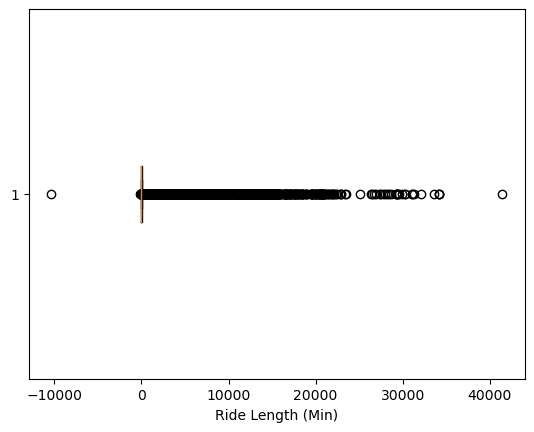

In [20]:
# Create a box plot to investigate the ride_length outliers.
plt.boxplot(df['ride_length'], vert=False)
plt.xlabel('Ride Length (Min)')

In [21]:
# Get the types of bike
df['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [22]:
# Invistigate the docked bikes
df_docks = df[df['rideable_type'] == 'docked_bike']
df_docks

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
20,3327BC0B2FC92863,docked_bike,2022-07-24 19:07:19,2022-07-24 19:32:23,41.877245,-87.639366,casual,25,19,7,Sunday,7,July,summer
25,55661F65ED2D1B17,docked_bike,2022-07-04 09:32:35,2022-07-04 10:44:37,41.918018,-87.652182,casual,72,9,1,Monday,7,July,summer
32,4946669C635F0B51,docked_bike,2022-07-21 18:58:17,2022-07-21 20:18:46,41.773721,-87.605635,casual,80,18,4,Thursday,7,July,summer
46,769DF45E5582B3CF,docked_bike,2022-07-09 14:40:04,2022-07-09 16:59:28,41.907066,-87.667252,casual,139,14,6,Saturday,7,July,summer
57,C4A5257D2790E735,docked_bike,2022-07-19 19:12:31,2022-07-19 19:33:34,41.871467,-87.640949,casual,21,19,2,Tuesday,7,July,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779056,F7FC209860B5994A,docked_bike,2023-06-08 11:51:14,2023-06-08 12:07:48,41.886976,-87.612813,casual,16,11,4,Thursday,6,June,summer
5779072,48597496C3783A28,docked_bike,2023-06-23 18:01:59,2023-06-23 18:23:27,42.052939,-87.673447,casual,21,18,5,Friday,6,June,summer
5779315,6445BF0AC9810E43,docked_bike,2023-06-23 18:34:00,2023-06-23 19:07:33,41.946655,-87.683359,casual,33,18,5,Friday,6,June,summer
5779402,D9E50AEA4B3020F6,docked_bike,2023-06-22 19:36:17,2023-06-22 20:06:38,41.900363,-87.696704,casual,30,19,4,Thursday,6,June,summer


- From the information given about the company, Customers who purchase single-ride or full-day passes are referred to as casual riders. So the data where the casual riders made a ride length more than 24 hours is invalid data and need to be removed (I would ask more questions about these values to understand the reason behind it, but for the purpose of this project i will choose to remove it)

In [23]:
# creat a new df that has the data for casual riders where the ride_lenght > 24 hours
one_day = 24*60
over_time_data = df[(df['ride_length'] > one_day) & (df['member_casual'] == 'casual')]
over_time_data

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
11958,E5886B2D636415DF,docked_bike,2022-07-10 18:52:42,2022-07-18 06:59:55,41.880958,-87.616743,casual,10807,18,7,Sunday,7,July,summer
36126,87BB03841B82D504,docked_bike,2022-07-02 07:08:11,2022-07-03 08:08:12,41.963982,-87.638181,casual,1500,7,6,Saturday,7,July,summer
36267,25A007F2C8F64C47,docked_bike,2022-07-31 03:43:11,2022-08-01 04:43:11,41.940180,-87.653040,casual,1500,3,7,Sunday,7,July,summer
36298,3214D4171EFEABB8,docked_bike,2022-07-04 14:48:04,2022-07-06 04:35:55,41.994780,-87.660285,casual,2267,14,1,Monday,7,July,summer
36335,56CDD157E2A5FA9E,docked_bike,2022-07-09 17:30:57,2022-07-11 04:53:37,41.906866,-87.626217,casual,2122,17,6,Saturday,7,July,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778938,15735D040A691F1A,docked_bike,2023-06-07 17:50:53,2023-06-17 19:28:27,41.886976,-87.612813,casual,14497,17,3,Wednesday,6,June,summer
5779241,C7B545B3BE23D680,classic_bike,2023-06-11 00:03:01,2023-06-12 01:02:48,41.946655,-87.683359,casual,1499,0,7,Sunday,6,June,summer
5779322,135D6E16C06A802E,classic_bike,2023-06-19 14:02:04,2023-06-20 15:01:43,41.961507,-87.671387,casual,1499,14,1,Monday,6,June,summer
5779428,AF036A8A8EBF731E,docked_bike,2023-06-10 11:56:08,2023-06-15 04:57:09,41.915689,-87.634600,casual,6781,11,6,Saturday,6,June,summer


In [24]:
#droping wrong time rows
df.drop(over_time_data.index, axis=0, inplace=True)

In [25]:
# check for wrong state time
wrong_time = df[df['started_at'] > df['ended_at']]
wrong_time

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
27467,029D853B5C38426E,classic_bike,2022-07-26 20:07:33,2022-07-26 19:59:34,41.943350,-87.670668,member,-7,20,2,Tuesday,7,July,summer
27468,C1D6D749139CB6C0,classic_bike,2022-07-26 20:08:04,2022-07-26 19:59:34,41.943350,-87.670668,member,-8,20,2,Tuesday,7,July,summer
27625,D3E7C0B68EFEC32B,classic_bike,2022-07-26 20:20:31,2022-07-26 19:59:34,41.943350,-87.670668,casual,-20,20,2,Tuesday,7,July,summer
27674,48EA91B86A4220BD,classic_bike,2022-07-26 18:35:57,2022-07-26 18:32:30,41.943350,-87.670668,casual,-3,18,2,Tuesday,7,July,summer
135932,A9E0DA69675D6A16,electric_bike,2022-07-01 14:35:12,2022-07-01 14:31:50,41.890000,-87.610000,casual,-3,14,5,Friday,7,July,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427698,D12C3767DC204369,electric_bike,2023-06-02 19:29:42,2023-06-02 18:40:44,41.860000,-87.620000,casual,-48,19,5,Friday,6,June,summer
5442926,199D68ECEC1DACF3,electric_bike,2023-06-10 15:49:14,2023-06-10 15:49:13,41.853183,-87.631854,casual,0,15,6,Saturday,6,June,summer
5680565,3FC95E908B945FE2,electric_bike,2023-06-04 18:14:41,2023-06-04 18:14:31,41.877833,-87.624095,casual,0,18,7,Sunday,6,June,summer
5698433,318E29DFACCD7C24,electric_bike,2023-06-02 23:26:45,2023-06-02 23:10:38,41.900000,-87.630000,member,-16,23,5,Friday,6,June,summer


- I will choose to drop the wrong time values (107) because they are not significant to the data

In [26]:
#droping wrong time rows as they are not significant
df.drop(wrong_time.index, axis=0, inplace=True)

In [27]:
# Find if there are 0 values in the ride_length column
zero_length_time = df[df['ride_length'] <= 0]
zero_length_time

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
29,DBA6BF86FC23B1F3,classic_bike,2022-07-31 15:42:07,2022-07-31 15:42:21,41.910535,-87.689556,member,0,15,7,Sunday,7,July,summer
31,6614263E987C229A,classic_bike,2022-07-01 18:57:37,2022-07-01 18:58:07,41.932590,-87.665936,member,0,18,5,Friday,7,July,summer
36,2506DC75195A100C,classic_bike,2022-07-25 09:05:25,2022-07-25 09:05:53,41.802406,-87.586924,member,0,9,1,Monday,7,July,summer
44,AE7DD2368297EDFC,electric_bike,2022-07-28 17:23:51,2022-07-28 17:24:12,41.891770,-87.658845,member,0,17,4,Thursday,7,July,summer
185,DFE58CAA7DA5CA46,classic_bike,2022-07-08 00:36:43,2022-07-08 00:36:47,41.912919,-87.664169,member,0,0,5,Friday,7,July,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779273,7B58A5A73EC2839C,electric_bike,2023-06-16 09:31:23,2023-06-16 09:31:27,41.892046,-87.620396,member,0,9,5,Friday,6,June,summer
5779337,939FEC30CA218E70,electric_bike,2023-06-11 15:39:27,2023-06-11 15:40:08,41.946510,-87.683369,casual,0,15,7,Sunday,6,June,summer
5779340,9C190CCF75D2FDD4,electric_bike,2023-06-11 16:43:16,2023-06-11 16:44:03,41.891986,-87.620439,casual,0,16,7,Sunday,6,June,summer
5779358,5DB9ECFA03CB7E35,electric_bike,2023-06-15 07:57:34,2023-06-15 07:57:47,41.883236,-87.641373,member,0,7,4,Thursday,6,June,summer


In [28]:
#droping zero ride length rows as they are not not meaningful.
df.drop(zero_length_time.index, axis=0, inplace=True)
df.shape

(5625773, 14)

In [29]:
# Calculate 25th percentile of ride_length
percentile25 = df['ride_length'].quantile(0.25)

# Calculate 75th percentile of ride_length
percentile75 = df['ride_length'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: ', lower_limit)
print('Upper Limit is: ', upper_limit)

Lower limit is:  -13.0
Upper Limit is:  35.0


In [30]:
lower_limit_df = df[df['ride_length'] < lower_limit]
lower_limit_df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season


In [31]:
upper_limit_df = df[df['ride_length'] > upper_limit]
upper_limit_df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,41.869621,-87.623981,casual,58,17,7,Sunday,7,July,summer
25,55661F65ED2D1B17,docked_bike,2022-07-04 09:32:35,2022-07-04 10:44:37,41.918018,-87.652182,casual,72,9,1,Monday,7,July,summer
26,A1A26DCD5E0D5CD8,classic_bike,2022-07-30 14:44:38,2022-07-30 15:25:37,41.802406,-87.586924,member,40,14,6,Saturday,7,July,summer
32,4946669C635F0B51,docked_bike,2022-07-21 18:58:17,2022-07-21 20:18:46,41.773721,-87.605635,casual,80,18,4,Thursday,7,July,summer
41,16266E4B55EA92E2,classic_bike,2022-07-21 13:50:48,2022-07-21 14:31:55,41.883165,-87.651100,member,41,13,4,Thursday,7,July,summer


In [32]:
upper_limit_df.shape

(398769, 14)

In [33]:
# Reassign all outlier values to match the median value.

# Calculate mean of all NON-OUTLIER values
median = np.median(df['ride_length'][df['ride_length'] <= upper_limit])

# Impute the mean for all values > upper_limit
df['ride_length'] = np.where(df['ride_length'] > upper_limit, median, df['ride_length'] )

In [34]:
df.describe()

,start_lat,start_lng,ride_length,hour_of_day,day_of_week,month
count,5.625773e+06,5.625773e+06,5.625773e+06,5.625773e+06,5.625773e+06,5.625773e+06
mean,4.190293e+01,-8.764763e+01,1.076096e+01,1.415318e+01,4.047566e+00,6.972871e+00
std,4.544661e-02,2.810051e-02,7.411395e+00,4.995574e+00,1.944569e+00,2.669377e+00
min,4.164000e+01,-8.787000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,4.188103e+01,-8.766121e+01,5.000000e+00,1.100000e+01,2.000000e+00,5.000000e+00
50%,4.190000e+01,-8.764414e+01,9.000000e+00,1.500000e+01,4.000000e+00,7.000000e+00
75%,4.193000e+01,-8.762998e+01,1.400000e+01,1.800000e+01,6.000000e+00,9.000000e+00
max,4.207000e+01,-8.752000e+01,3.500000e+01,2.300000e+01,7.000000e+00,1.200000e+01


Text(0.5, 0, 'Ride Length (Min)')

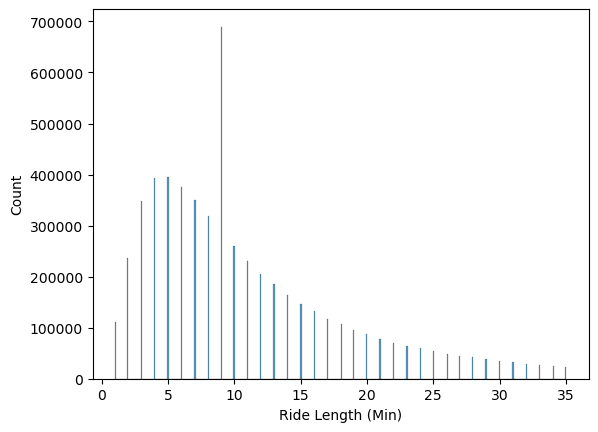

In [35]:
# Create a histplot to investigate the ride_length distribution.
sns.histplot(df['ride_length'])
plt.xlabel('Ride Length (Min)')

Text(0.5, 0, 'Ride Length (Min)')

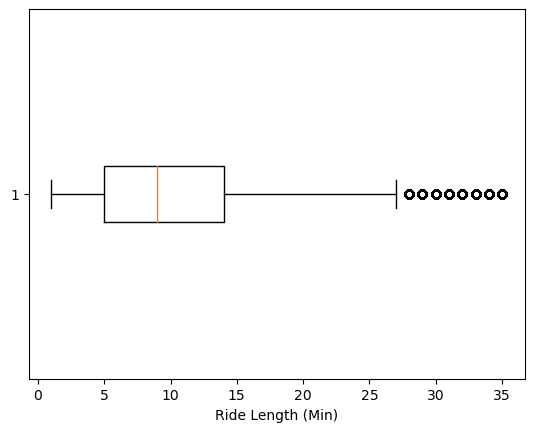

In [36]:
# Create a box plot to investigate the ride_length outliers.
plt.boxplot(df['ride_length'], vert=False)
plt.xlabel('Ride Length (Min)')

In [37]:
df[df['ride_length'] > 27.5]

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,hour_of_day,day_of_week,day_name,month,month_name,season
7,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,41.891466,-87.626761,casual,30.0,20,4,Thursday,7,July,summer
30,1A3FDE807BC010E0,classic_bike,2022-07-21 18:42:53,2022-07-21 19:12:19,41.910535,-87.689556,member,29.0,18,4,Thursday,7,July,summer
37,39F49D08AB4B9AB3,classic_bike,2022-07-16 09:39:39,2022-07-16 10:10:13,41.907066,-87.667252,member,30.0,9,6,Saturday,7,July,summer
52,1BE58BEBCF10B0A8,classic_bike,2022-07-08 16:55:20,2022-07-08 17:30:56,41.871262,-87.673688,member,35.0,16,5,Friday,7,July,summer
115,DCB0116FF41F722F,classic_bike,2022-07-18 17:40:35,2022-07-18 18:14:41,41.961154,-87.716569,casual,34.0,17,1,Monday,7,July,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779364,949320822C9024DF,electric_bike,2023-06-01 17:06:21,2023-06-01 17:39:17,41.883361,-87.641547,member,32.0,17,4,Thursday,6,June,summer
5779374,B2519D6D4EA5B2C1,electric_bike,2023-06-30 07:15:40,2023-06-30 07:46:02,41.891923,-87.620785,casual,30.0,7,5,Friday,6,June,summer
5779378,5D7D05086E4E29AF,electric_bike,2023-06-30 07:15:43,2023-06-30 07:46:16,41.892148,-87.620794,casual,30.0,7,5,Friday,6,June,summer
5779402,D9E50AEA4B3020F6,docked_bike,2023-06-22 19:36:17,2023-06-22 20:06:38,41.900363,-87.696704,casual,30.0,19,4,Thursday,6,June,summer


- The 35 min range seems reasonable, so I will leave these outlier values as they are.

In [38]:
# avg ride length
df['ride_length'].mean()

10.760960849291289

In [40]:
# avg ride length per the type of rider
avg_ride_per_rider = df.groupby('member_casual',as_index=False)['ride_length'].mean()
avg_ride_per_rider.rename(columns={'ride_length':'avg_ride_length'},inplace=True)
avg_ride_per_rider

,member_casual,avg_ride_length
0,casual,11.892106
1,member,10.042590


In [41]:
# count of rides per the type of rider
num_of_rides = df.groupby('member_casual', as_index = False)['ride_id'].count().sort_values('ride_id', ascending = False)
num_of_rides.rename(columns={'ride_id':'num_of_rides'},inplace=True)
num_of_rides

,member_casual,num_of_rides
1,member,3440666
0,casual,2185107


In [42]:
# most freq season per the type of rider
freq_season = df.groupby('member_casual')['season'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='most_freq_season')
print(freq_season)

  member_casual most_freq_season
0        casual           summer
1        member           summer


In [43]:
# most freq month per the type of rider
freq_month = df.groupby('member_casual')['month_name'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='most_freq_month')
print(freq_month)

  member_casual most_freq_month
0        casual            July
1        member          August


In [44]:
# most freq day per the type of rider
most_freq_day = df.groupby('member_casual')['day_name'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='most_freq_day')
print(most_freq_day)

  member_casual most_freq_day
0        casual      Saturday
1        member     Wednesday


In [45]:
# most freq hour of day per the type of rider
most_freq_hour = df.groupby('member_casual')['hour_of_day'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='most_freq_hour')
print(most_freq_hour)

  member_casual  most_freq_hour
0        casual              17
1        member              17


In [46]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month','month_name'])['ride_length'].mean().to_frame().sort_values('month', ascending = True).reset_index()
df_by_month

,month,month_name,ride_length
0,1,January,8.665442
1,2,February,9.001296
2,3,March,9.056062
3,4,April,10.267235
4,5,May,11.060385
5,6,June,11.378307
6,7,July,11.922391
7,8,August,11.555147
8,9,September,11.088193
9,10,October,10.222102


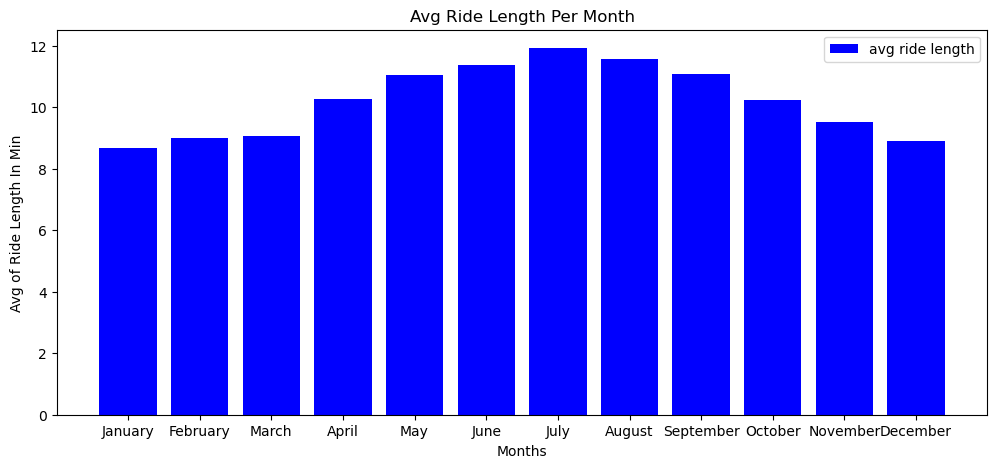

In [47]:
fig = plt.figure(figsize=(12, 5))
plt.bar(x=df_by_month['month_name'], height=df_by_month['ride_length'], width=0.8, color='blue', label='avg ride length')
plt.xlabel("Months")
plt.ylabel("Avg of Ride Length In Min")
plt.title("Avg Ride Length Per Month")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Ride Length In Min')

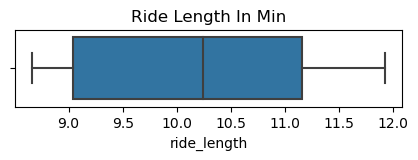

In [49]:
fig = plt.figure(figsize=(5, 1))
sns.boxplot(x=df_by_month['ride_length'])
plt.title("Ride Length In Min")

In [48]:
# save the df to a csv file
df.to_csv('all_bikeshare_data.csv', index = False)